描述性统计

In [86]:
import matplotlib
import matplotlib.font_manager as fm

# 自动检测本地可用的常见中文字体
preferred_zh_fonts = ['PingFang SC', 'STHeiti', 'Microsoft YaHei', 'Hiragino Sans GB', 'Songti SC', 'Heiti SC', 'FangSong', 'KaiTi']
available_fonts = set(f.name for f in fm.fontManager.ttflist)
selected_font = None
for f in preferred_zh_fonts:
    if f in available_fonts:
        selected_font = f
        break

if selected_font:
    matplotlib.rcParams['font.sans-serif'] = [selected_font]
    print(f"使用字体: {selected_font}")
else:
    matplotlib.rcParams['font.sans-serif'] = ['Arial Unicode MS']
    print("未找到常见中文字体，使用Arial Unicode MS（部分中文可能无法显示）")

matplotlib.rcParams['axes.unicode_minus'] = False

使用字体: STHeiti


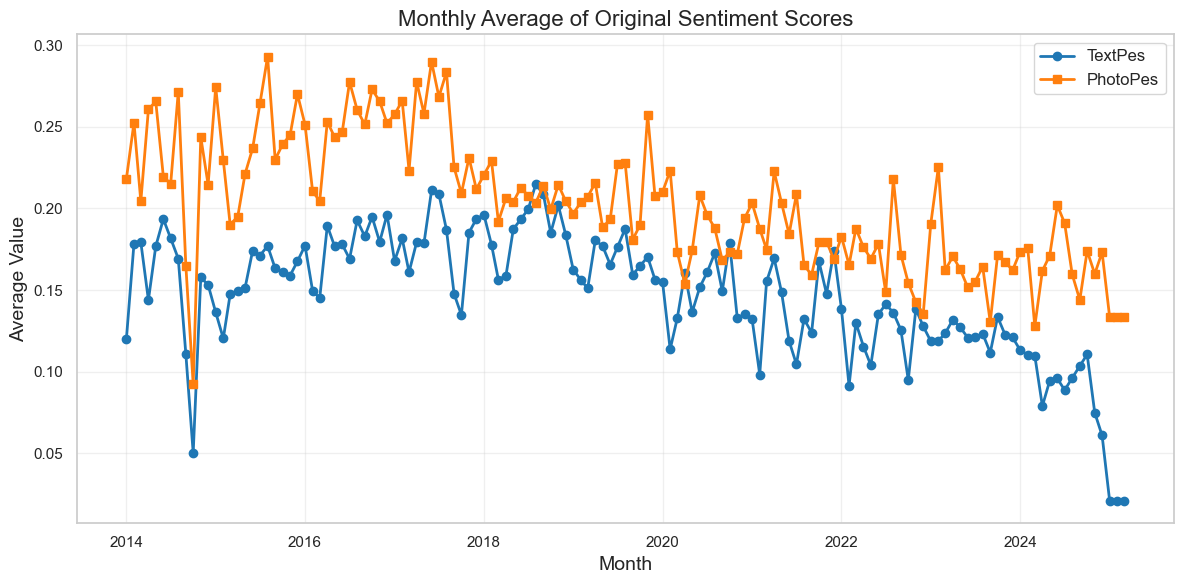

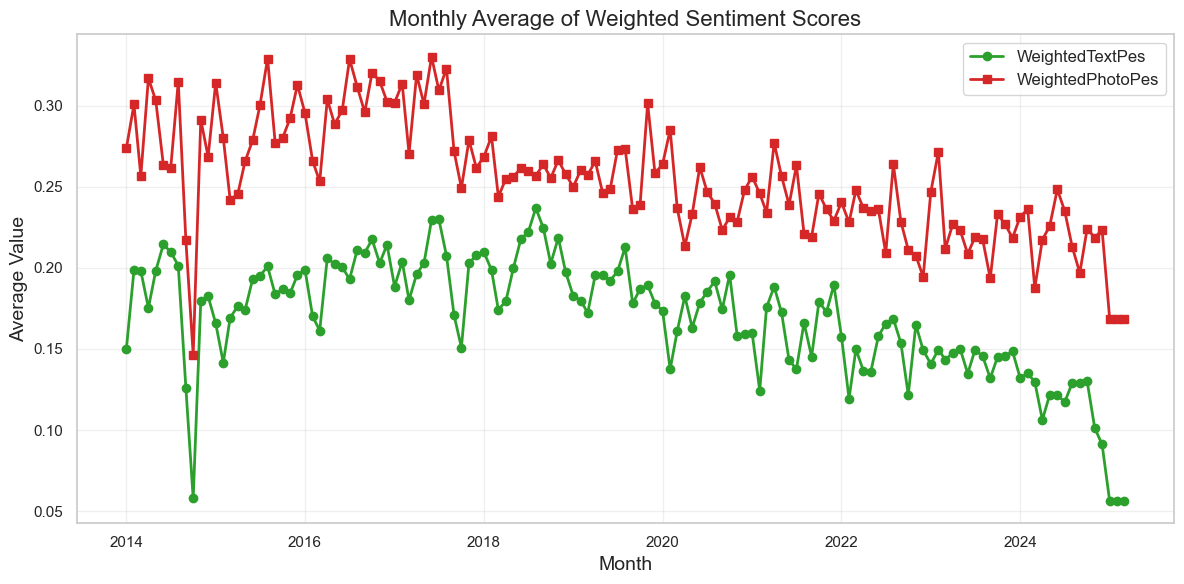

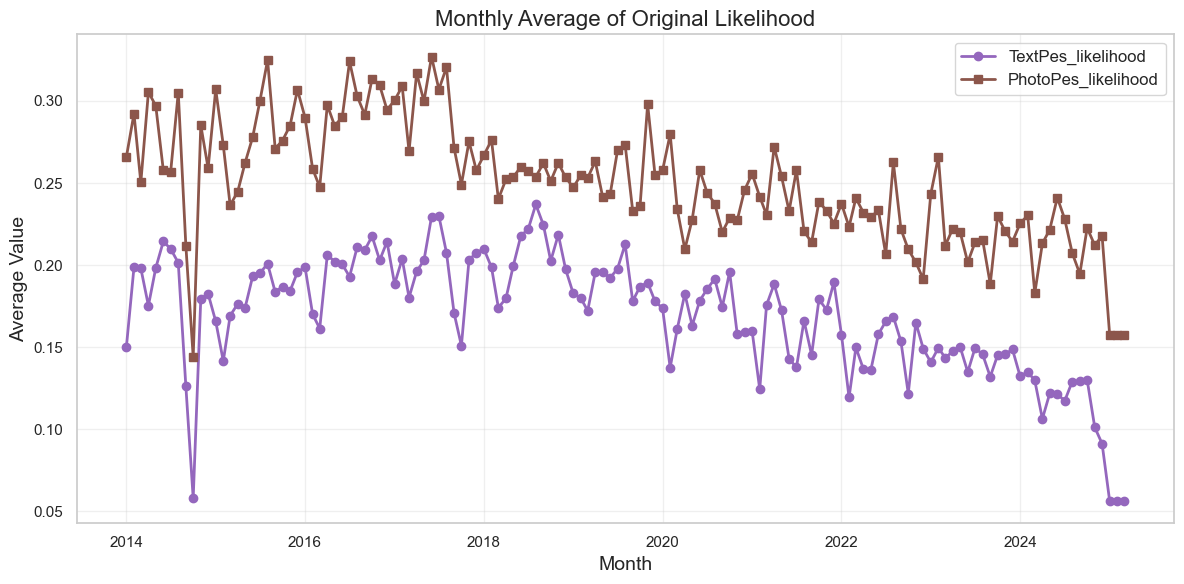

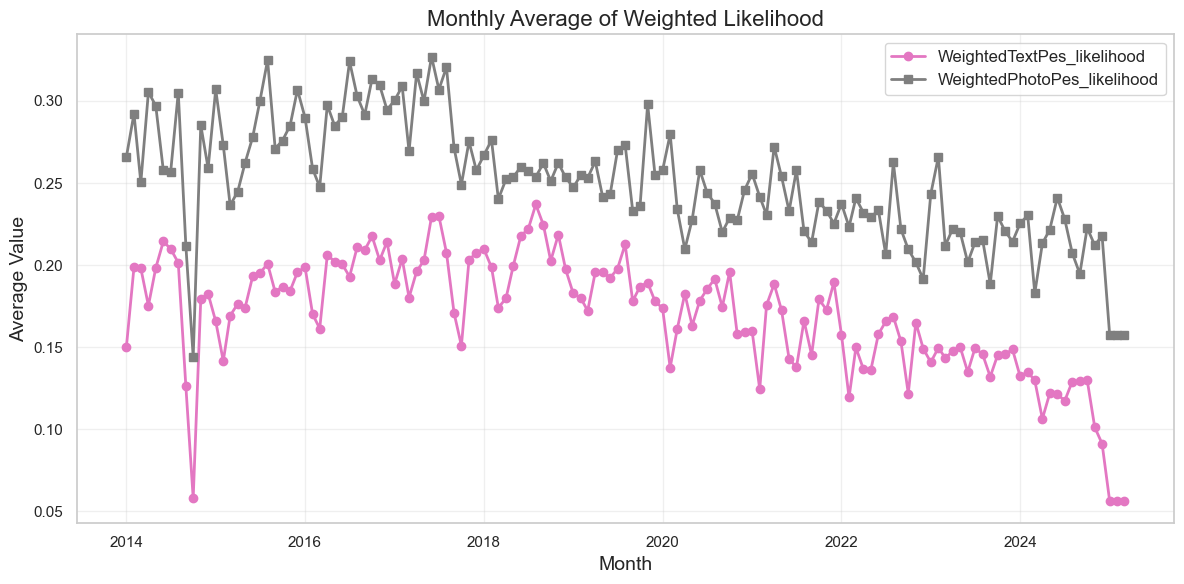

In [55]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.font_manager as fm

# 使用英文标签避免中文乱码问题
matplotlib.rcParams['axes.unicode_minus'] = False

# 设置绘图风格
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 12})

def plot_sentiment_trends_by_type(df, output_dir=None):
    """
    将同类型的TextPes和PhotoPes放在同一张图中，绘制月均值趋势
    使用英文标签避免字体问题
    """
    # 确保日期列格式正确
    df = df.copy()
    if not pd.api.types.is_datetime64_any_dtype(df['Date']):
        df['Date'] = pd.to_datetime(df['Date'])
    
    # 添加月份列
    df['Month'] = df['Date'].dt.to_period('M').dt.to_timestamp()
    
    # 按月份计算均值
    monthly_df = df.groupby('Month').agg({
        'TextPes': 'mean',
        'PhotoPes': 'mean',
        'WeightedTextPes': 'mean',
        'WeightedPhotoPes': 'mean',
        'TextPes_likelihood': 'mean',
        'PhotoPes_likelihood': 'mean',
        'WeightedTextPes_likelihood': 'mean',
        'WeightedPhotoPes_likelihood': 'mean'
    }).reset_index()
    
    # 创建输出目录
    if output_dir and not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # 绘制四张图表 - 使用英文标签
    plot_configs = [
        {
            'title': 'Monthly Average of Original Sentiment Scores',
            'columns': ['TextPes', 'PhotoPes'],
            'colors': ['#1f77b4', '#ff7f0e'],
            'markers': ['o', 's'],
            'filename': 'original_sentiment_trend.png'
        },
        {
            'title': 'Monthly Average of Weighted Sentiment Scores',
            'columns': ['WeightedTextPes', 'WeightedPhotoPes'],
            'colors': ['#2ca02c', '#d62728'],
            'markers': ['o', 's'],
            'filename': 'weighted_sentiment_trend.png'
        },
        {
            'title': 'Monthly Average of Original Likelihood',
            'columns': ['TextPes_likelihood', 'PhotoPes_likelihood'],
            'colors': ['#9467bd', '#8c564b'],
            'markers': ['o', 's'],
            'filename': 'original_likelihood_trend.png'
        },
        {
            'title': 'Monthly Average of Weighted Likelihood',
            'columns': ['WeightedTextPes_likelihood', 'WeightedPhotoPes_likelihood'],
            'colors': ['#e377c2', '#7f7f7f'],
            'markers': ['o', 's'],
            'filename': 'weighted_likelihood_trend.png'
        }
    ]
    
    for config in plot_configs:
        # 检查列是否存在
        valid_cols = [col for col in config['columns'] if col in monthly_df.columns]
        if not valid_cols:
            print(f"Skipping {config['title']} - columns not found")
            continue
            
        plt.figure(figsize=(12, 6))
        
        for i, col in enumerate(valid_cols):
            plt.plot(
                monthly_df['Month'], 
                monthly_df[col], 
                marker=config['markers'][i],
                color=config['colors'][i],
                linewidth=2,
                markersize=6,
                label=col
            )
        
        plt.title(config['title'], fontsize=16)
        plt.xlabel('Month', fontsize=14)
        plt.ylabel('Average Value', fontsize=14)
        plt.grid(True, alpha=0.3)
        plt.legend(fontsize=12)
        plt.tight_layout()
        
        # 保存图片
        if output_dir:
            plt.savefig(os.path.join(output_dir, config['filename']), dpi=300, bbox_inches='tight')
        
        plt.show()
        plt.close()

# 使用示例
df = pd.read_csv('results/merged_market_sentiment_data.csv', parse_dates=['Date'])
plot_sentiment_trends_by_type(df, 'plots/sentiment_trends')


=== Basic File Information ===
File name: results/merged_market_sentiment_data.csv
Number of rows: 2716
Number of columns: 24
Date range: 2014-01-02 00:00:00 to 2025-03-06 00:00:00

Column names:
['Date', 'CSI 300', 'SSE Composite', 'SZSE Composite', 'ChiNext Composite', 'CSI 500', 'CSI 300_returns', 'CSI 300_log_returns', 'SSE Composite_returns', 'SSE Composite_log_returns', 'SZSE Composite_returns', 'SZSE Composite_log_returns', 'ChiNext Composite_returns', 'ChiNext Composite_log_returns', 'CSI 500_returns', 'CSI 500_log_returns', 'TextPes', 'TextPes_likelihood', 'WeightedTextPes', 'PhotoPes', 'PhotoPes_likelihood', 'WeightedPhotoPes', 'WeightedTextPes_likelihood', 'WeightedPhotoPes_likelihood']

=== Market Index Statistics ===

Market index statistics:
           CSI 300  SSE Composite  SZSE Composite  ChiNext Composite  \
count  2716.000000    2716.000000     2716.000000        2716.000000   
mean   3780.973195    3111.522338     1873.897367        2478.437907   
std     719.71251

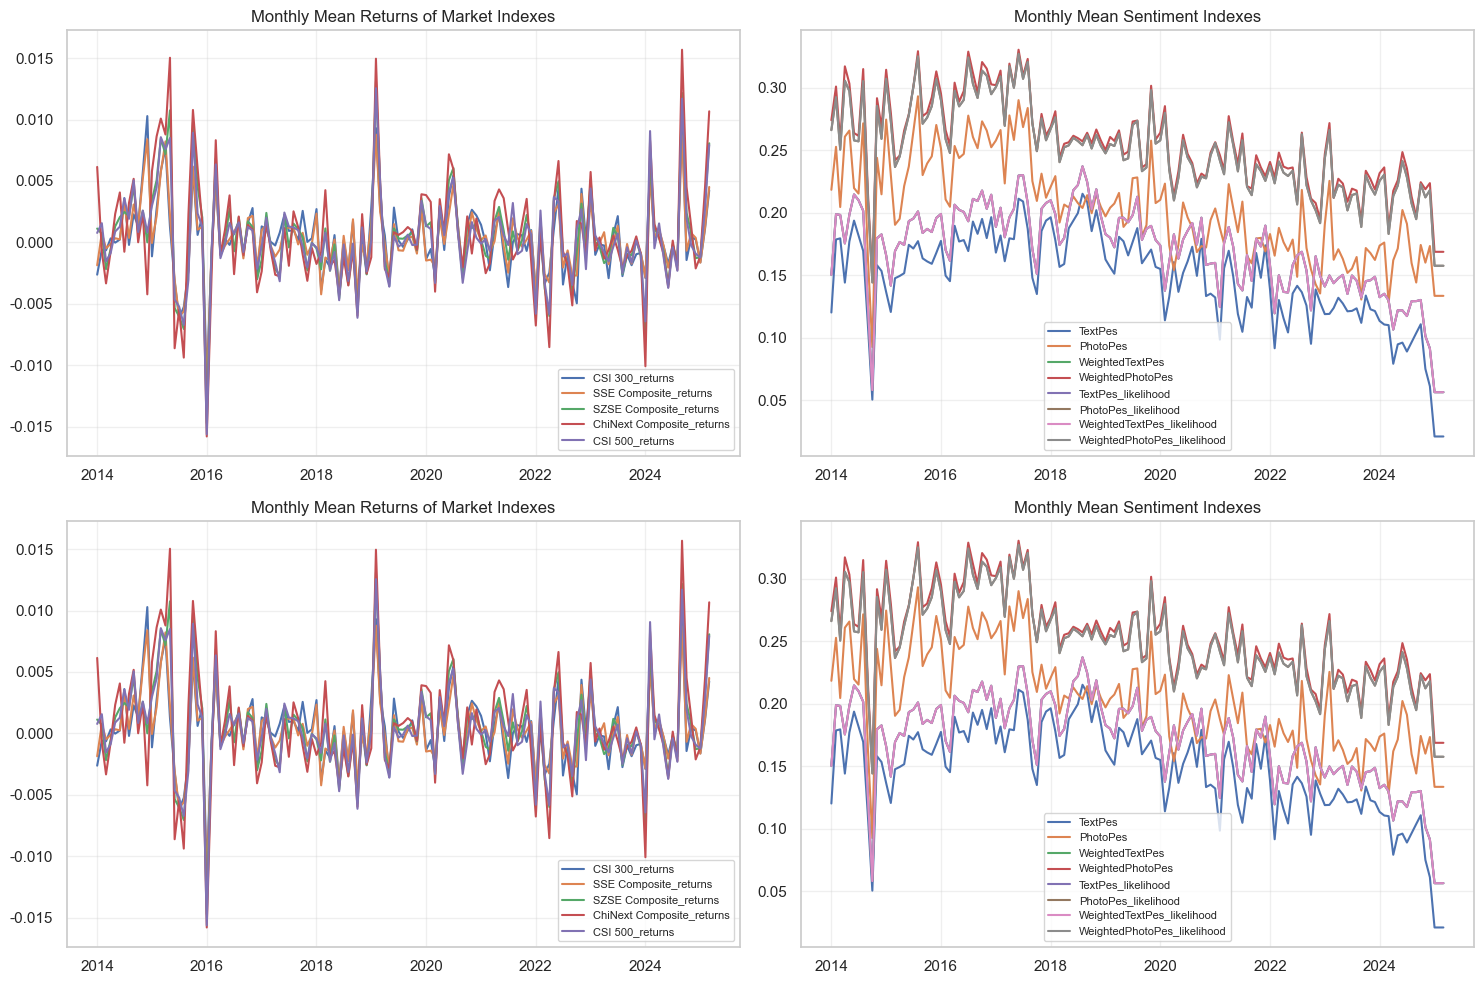

In [87]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.font_manager as fm

# 配置中文字体
zh_fonts = [f.name for f in fm.fontManager.ttflist if any(x in f.name for x in ['SimHei','Microsoft YaHei','STHeiti','Heiti','PingFang','Songti','FangSong','KaiTi'])]
if zh_fonts:
    matplotlib.rcParams['font.sans-serif'] = [zh_fonts[0]]
else:
    matplotlib.rcParams['font.sans-serif'] = ['Arial Unicode MS']
matplotlib.rcParams['axes.unicode_minus'] = False

# 设置绘图风格
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 12})

def analyze_market_sentiment_data():
    """
    Analyze merged_market_sentiment_data.csv file, including:
    1. Basic information
    2. Market index statistics
    3. Sentiment index statistics
    4. Time series analysis
    5. Correlation analysis
    """
    try:
        # 读取CSV文件
        file_path = "results/merged_market_sentiment_data.csv"
        df = pd.read_csv(file_path, parse_dates=['Date'])
        
        # 1. 基本信息
        print("\n=== Basic File Information ===")
        print(f"File name: {file_path}")
        print(f"Number of rows: {len(df)}")
        print(f"Number of columns: {len(df.columns)}")
        print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
        print("\nColumn names:")
        print(df.columns.tolist())
        
        # 2. 市场指数统计
        print("\n=== Market Index Statistics ===")
        index_cols = [col for col in df.columns if col in ['CSI 300', 'SSE Composite', 'SZSE Composite', 'ChiNext Composite', 'CSI 500']]
        returns_cols = [f"{col}_returns" for col in index_cols]
        print("\nMarket index statistics:")
        print(df[index_cols].describe())
        
        # 3. 情感指标统计
        print("\n=== Sentiment Index Statistics ===")
        sentiment_cols = [
            'TextPes', 'PhotoPes', 
            'WeightedTextPes', 'WeightedPhotoPes',
            'TextPes_likelihood', 'PhotoPes_likelihood',
            'WeightedTextPes_likelihood', 'WeightedPhotoPes_likelihood'
        ]
        print(df[sentiment_cols].describe())
        
        # 4. 时间序列分析
        print("\n=== Time Series Analysis ===")
        df['YearMonth'] = df['Date'].dt.to_period('M').dt.to_timestamp()
        
        # 创建子图
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # 1. 市场指数月度均值
        monthly_returns = df.groupby('YearMonth')[returns_cols].mean()
        axes[0, 0].plot(monthly_returns)
        axes[0, 0].set_title('Monthly Mean Returns of Market Indexes')
        axes[0, 0].legend(returns_cols, fontsize=8)
        axes[0, 0].grid(True, alpha=0.3)
        
        # 2. 情感指标月度均值
        monthly_sentiment = df.groupby('YearMonth')[sentiment_cols].mean()
        axes[0, 1].plot(monthly_sentiment)
        axes[0, 1].set_title('Monthly Mean Sentiment Indexes')
        axes[0, 1].legend(sentiment_cols, fontsize=8)
        axes[0, 1].grid(True, alpha=0.3)
        
        # 3. 市场指数月度均值
        axes[1, 0].plot(monthly_returns)
        axes[1, 0].set_title('Monthly Mean Returns of Market Indexes')
        axes[1, 0].legend(returns_cols, fontsize=8)
        axes[1, 0].grid(True, alpha=0.3)
        
        # 4. 情感指标月度均值
        axes[1, 1].plot(monthly_sentiment)
        axes[1, 1].set_title('Monthly Mean Sentiment Indexes')
        axes[1, 1].legend(sentiment_cols, fontsize=8)
        axes[1, 1].grid(True, alpha=0.3)
        
        # 调整布局
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Analyzing data failed: {e}")

# 调用函数
analyze_market_sentiment_data()

2025-05-03 22:24:23,203 - INFO - 使用中文字体: STHeiti


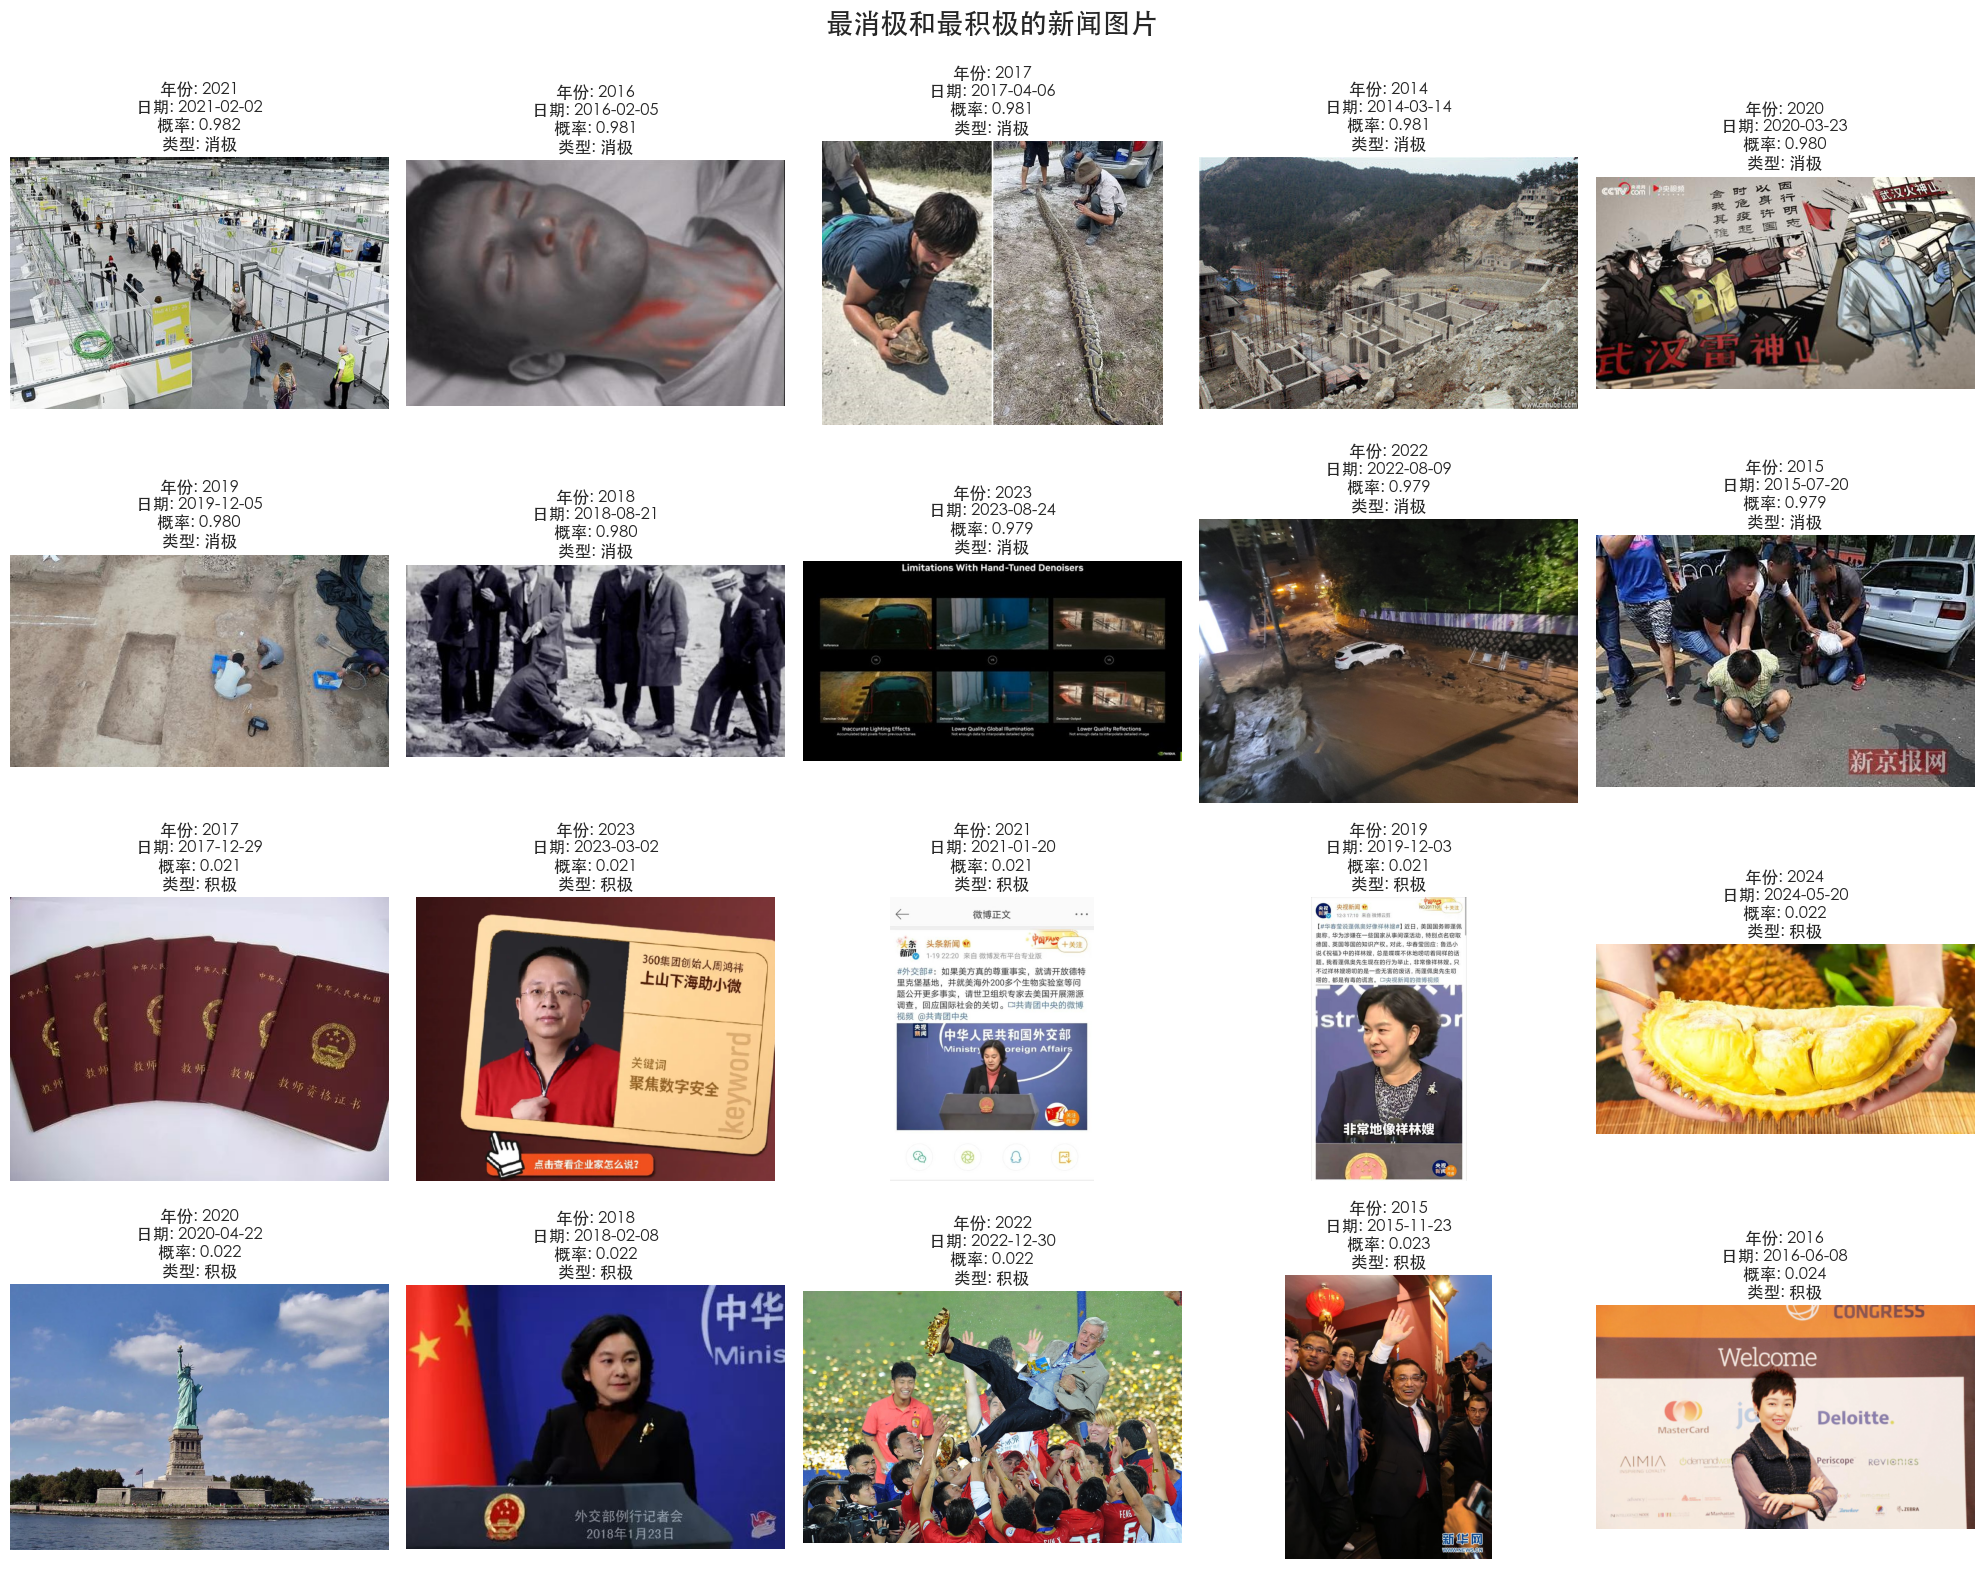

共找到 10 张最消极图片和 10 张最积极图片
图片已保存至: extreme_sentiment_images.png


In [89]:
def display_extreme_images(db, years=range(2014,2025), top_n=10, save_path="extreme_images.png"):
    """
    显示指定年份中消极概率最高和最低的图片，并保存为图片文件
    
    参数:
        db: MongoDB连接
        years: 要查询的年份列表
        top_n: 每类显示的图片数量
        save_path: 保存图片的路径
    """
    import matplotlib.pyplot as plt
    import matplotlib.font_manager as fm
    import os
    import re
    import logging
    from PIL import Image
    import matplotlib as mpl
    
    # 设置中文字体
    # 检查系统中可用的中文字体
    chinese_fonts = ['STHeiti']
    font_found = False
    
    for font in chinese_fonts:
        try:
            mpl.font_manager.findfont(font)
            plt.rcParams['font.sans-serif'] = [font]
            font_found = True
            logging.info(f"使用中文字体: {font}")
            break
        except:
            continue
    
    if not font_found:
        # 如果找不到中文字体，使用系统默认字体
        plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
        logging.warning("未找到中文字体，使用系统默认字体")
    
    plt.rcParams['axes.unicode_minus'] = False
    
    # 存储所有结果
    most_negative = []
    most_positive = []
    
    # 从每个年份的sentiment集合中获取数据
    for year in years:
        collection_name = f"{year}_sentiment"
        
        # 检查集合是否存在
        if collection_name not in db.list_collection_names():
            logging.warning(f"集合 {collection_name} 不存在，跳过处理")
            continue
        
        collection = db[collection_name]
        
        # 查询消极概率最高的图片
        neg_results = list(collection.find(
            {"negative_likelihood": {"$exists": True}}, 
            {"image_path": 1, "negative_likelihood": 1, "news_date": 1, "original_id": 1, "_id": 0}
        ).sort("negative_likelihood", -1).limit(top_n//len(years) + 1))
        
        # 查询消极概率最低的图片
        pos_results = list(collection.find(
            {"negative_likelihood": {"$exists": True}}, 
            {"image_path": 1, "negative_likelihood": 1, "news_date": 1, "original_id": 1, "_id": 0}
        ).sort("negative_likelihood", 1).limit(top_n//len(years) + 1))
        
        # 添加年份信息
        for item in neg_results + pos_results:
            item['year'] = year
        
        most_negative.extend(neg_results)
        most_positive.extend(pos_results)
    
    # 按消极概率排序
    most_negative = sorted(most_negative, key=lambda x: x.get("negative_likelihood", 0), reverse=True)[:top_n]
    most_positive = sorted(most_positive, key=lambda x: x.get("negative_likelihood", 1))[:top_n]
    
    # 将所有图片合并到一个列表中，前10个是消极的，后10个是积极的
    all_images = most_negative + most_positive
    
    # 创建一个4*5的图表来显示所有图片
    fig, axes = plt.subplots(4, 5, figsize=(20, 16))
    
    # 扁平化axes数组以便于索引
    axes = axes.flatten()
    
    # 添加所有图片到图表
    for i, img_data in enumerate(all_images):
        if i >= 20:  # 只显示20张图片
            break
            
        # 获取图片路径 - 适应新的数据结构
        img_path = img_data.get("image_path", "")
        neg_likelihood = img_data.get("negative_likelihood", 0)
        year = img_data.get("year", "未知")
        
        # 如果路径为空，尝试从original_id构建路径
        if not img_path and "original_id" in img_data:
            original_id = img_data["original_id"]
            # 尝试从filtered集合获取图片路径
            filtered_doc = db[f"{year}_filtered"].find_one({"original_id": original_id})
            if filtered_doc and "image_path" in filtered_doc:
                img_path = filtered_doc["image_path"]
        
        # 获取日期信息
        news_date = img_data.get("news_date", "")
        if news_date:
            date_str = str(news_date).split(" ")[0]  # 只取日期部分
        else:
            date_str = "未知日期"
        
        # 加载并显示图片
        if img_path and os.path.exists(img_path):
            try:
                img = Image.open(img_path)
                axes[i].imshow(img)
            except Exception as e:
                axes[i].text(0.5, 0.5, f'图片加载失败: {e}', 
                            horizontalalignment='center',
                            verticalalignment='center',
                            transform=axes[i].transAxes,
                            fontsize=8)
        else:
            axes[i].text(0.5, 0.5, f'图片不存在\n路径: {img_path}', 
                        horizontalalignment='center',
                        verticalalignment='center',
                        transform=axes[i].transAxes,
                        fontsize=8)
        
        # 设置标题和去除坐标轴
        sentiment_type = "消极" if i < top_n else "积极"
        axes[i].set_title(f"年份: {year}\n日期: {date_str}\n概率: {neg_likelihood:.3f}\n类型: {sentiment_type}", fontproperties=fm.FontProperties(fname=mpl.font_manager.findfont(mpl.font_manager.FontProperties(family=plt.rcParams['font.sans-serif'][0]))))
        axes[i].axis('off')
    
    # 添加总标题
    plt.suptitle("最消极和最积极的新闻图片", fontsize=20, fontproperties=fm.FontProperties(fname=mpl.font_manager.findfont(mpl.font_manager.FontProperties(family=plt.rcParams['font.sans-serif'][0]))))
    
    # 调整布局
    plt.tight_layout(rect=[0, 0, 1, 0.97])  # 为顶部标题留出空间
    
    # 保存图片
    plt.savefig(save_path, dpi=150, bbox_inches='tight')
    
    # 显示图片
    plt.show()
    
    # 打印统计信息
    print(f"共找到 {len(most_negative)} 张最消极图片和 {len(most_positive)} 张最积极图片")
    print(f"图片已保存至: {save_path}")

# 执行函数显示极端情感图片
try:
    # 连接数据库
    from pymongo import MongoClient
    import logging
    
    # 配置日志
    logging.basicConfig(
        level=logging.INFO,
        format='%(asctime)s - %(levelname)s - %(message)s'
    )
    
    # 连接到MongoDB - 修改为当前使用的数据库名称
    client = MongoClient('mongodb://localhost:27017/')
    db = client['sina_news_dataset_test']  # 根据calculate_daily_photopes.py中的数据库名称调整
    
    # 显示2014-2024年的极端情感图片并保存为图片文件
    display_extreme_images(db, years=list(range(2014,2025)), top_n=10, save_path="extreme_sentiment_images.png")
    
except Exception as e:
    import logging
    logging.error(f"显示极端情感图片时出错: {e}")
    import traceback
    traceback.print_exc()

回归

参数选择：
- sentiment_type: 选择情感指标类型，可选'PhotoPes', 'TextPes', 'WeightedPhotoPes', 'WeightedTextPes'
- use_likelihood: 是否使用likelihood版本的指标
- start_year, end_year: 分析的年份范围
- lag_periods: 滞后期数，默认为5
- data_file: 数据文件路径，默认为'results/merged_market_sentiment_data.csv'

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
from tabulate import tabulate
import logging
import os
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# 配置日志
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)

def analyze_sentiment_impact(
    sentiment_type='PhotoPes',  # 可选: 'PhotoPes', 'TextPes', 'WeightedPhotoPes', 'WeightedTextPes'
    use_likelihood=False,       # 是否使用likelihood版本
    start_year=None,            # 开始年份
    end_year=None,              # 结束年份
    lag_periods=5,              # 滞后期数
    data_file='results/merged_market_sentiment_data.csv'  # 数据文件路径
):
    """
    分析情感指标对市场回报的影响。
    
    回归方程:
    Rt = β1L(sentiment_t) + β2L(Rt) + β3L(R²t) + β4Xt + εt
    
    其中:
    - sentiment_t: 选定的情感指标
    - L: lag_periods阶滞后
    - Xt: 外生变量(常数项、星期虚拟变量(除周一)、衰退期虚拟变量)
    
    参数:
    - sentiment_type: 情感指标类型，可选'PhotoPes', 'TextPes', 'WeightedPhotoPes', 'WeightedTextPes'
    - use_likelihood: 是否使用likelihood版本的指标
    - start_year, end_year: 分析的年份范围
    - lag_periods: 滞后期数
    - data_file: 数据文件路径
    
    返回:
    - 清洗后的数据框
    """
    # 构建完整的情感指标名称
    if use_likelihood:
        sentiment_col = f"{sentiment_type}_likelihood"
    else:
        sentiment_col = sentiment_type
        
    logging.info(f"开始分析{sentiment_col}对市场回报的影响...")
    
    try:
        # 读取数据
        df = pd.read_csv(data_file)
        
        # 确保日期列格式正确
        df['Date'] = pd.to_datetime(df['Date'])
        
        # 根据年份筛选数据
        if start_year:
            df = df[df['Date'].dt.year >= start_year]
        if end_year:
            df = df[df['Date'].dt.year <= end_year]
            
        # 设置日期为索引
        df.set_index('Date', inplace=True)
            
        # 识别收益率列
        return_cols = [col for col in df.columns if '_returns' in col and not 'log' in col]
        
        # 对收益率指标进行对数化处理
        for col in return_cols:
            df[col] = np.log(1 + df[col])
            
        # 检查情感指标是否存在
        if sentiment_col not in df.columns:
            logging.error(f"情感指标 {sentiment_col} 不存在于数据中")
            return None
            
        # 创建滞后变量
        for i in range(1, lag_periods + 1):
            df[f'{sentiment_col}_lag{i}'] = df[sentiment_col].shift(i)
            
        # 为每个指数回报创建滞后和平方项
        for col in return_cols:
            base_name = col.replace('_returns', '')
            for i in range(1, lag_periods + 1):
                df[f'{col}_lag{i}'] = df[col].shift(i)
                df[f'{col}_squared_lag{i}'] = df[col].shift(i) ** 2
        
        # 创建星期虚拟变量(除周一)
        df['weekday'] = df.index.dayofweek
        for i in range(1, 5):  # 星期二到星期五
            df[f'weekday_{i+1}'] = (df['weekday'] == i).astype(int)
            
        # 对情感指标进行1%水平缩尾处理和标准化
        df[sentiment_col] = stats.mstats.winsorize(df[sentiment_col], limits=[0.01, 0.01])
        df[f'{sentiment_col}_std'] = (df[sentiment_col] - df[sentiment_col].mean()) / df[sentiment_col].std()
        
        # 创建滞后的标准化变量
        for i in range(1, lag_periods + 1):
            df[f'{sentiment_col}_std_lag{i}'] = df[f'{sentiment_col}_std'].shift(i)
            
        # 删除含有NaN的行
        df_clean = df.dropna()
        
        # 准备结果存储
        results_table = []
        
        # 对每个回报列进行回归
        for col in return_cols:
            base_name = col.replace('_returns', '')
            
            # 构建自变量列表
            X_vars = []
            # 情感指标滞后项
            for i in range(1, lag_periods + 1):
                X_vars.append(f'{sentiment_col}_std_lag{i}')
            
            # 收益率滞后项和平方项
            for i in range(1, lag_periods + 1):
                X_vars.append(f'{col}_lag{i}')
                X_vars.append(f'{col}_squared_lag{i}')
            
            # 星期虚拟变量(除周一)
            for i in range(2, 6):
                X_vars.append(f'weekday_{i}')
                
            # 准备回归数据
            X = df_clean[X_vars]
            X = add_constant(X)
            y = df_clean[col]
            
            # 运行回归(使用Newey-West标准误)
            model = sm.OLS(y, X)
            results = model.fit(cov_type='HAC', cov_kwds={'maxlags': lag_periods})
            
            # 提取情感指标系数和t值
            sentiment_coefs = []
            sentiment_t_stats = []
            for i in range(1, lag_periods + 1):
                var_name = f'{sentiment_col}_std_lag{i}'
                idx = X.columns.get_loc(var_name)
                coef = results.params.iloc[idx]
                t_stat = results.tvalues.iloc[idx]
                sentiment_coefs.append(coef)
                sentiment_t_stats.append(t_stat)
                
            # 计算累积效应
            sum_3_to_5 = sum(sentiment_coefs[2:5]) if lag_periods >= 5 else None
            sum_4_to_5 = sum(sentiment_coefs[3:5]) if lag_periods >= 5 else None
            
            # 计算累积效应的t统计量
            t_stat_3_to_5 = None
            t_stat_4_to_5 = None
            
            if lag_periods >= 5:
                # 计算t-3到t-5的累积效应t统计量
                var_3_to_5 = 0
                cov_matrix = results.cov_params().iloc[3:6, 3:6]  # 获取t-3到t-5的协方差矩阵
                for i in range(3):
                    for j in range(3):
                        var_3_to_5 += cov_matrix.iloc[i,j]
                t_stat_3_to_5 = sum_3_to_5 / np.sqrt(var_3_to_5) if var_3_to_5 > 0 else 0
                
                # 计算t-4到t-5的累积效应t统计量
                var_4_to_5 = 0
                cov_matrix = results.cov_params().iloc[4:6, 4:6]  # 获取t-4到t-5的协方差矩阵
                for i in range(2):
                    for j in range(2):
                        var_4_to_5 += cov_matrix.iloc[i,j]
                t_stat_4_to_5 = sum_4_to_5 / np.sqrt(var_4_to_5) if var_4_to_5 > 0 else 0
                
            # 存储结果
            results_table.append({
                'Index': base_name,
                'Lags': list(zip(sentiment_coefs, sentiment_t_stats)),
                'Sum_3_to_5': (sum_3_to_5, t_stat_3_to_5) if sum_3_to_5 is not None else None,
                'Sum_4_to_5': (sum_4_to_5, t_stat_4_to_5) if sum_4_to_5 is not None else None,
                'R2': results.rsquared,
                'Adj_R2': results.rsquared_adj,
                'N': len(y)
            })
            
        # 创建表格输出
        def format_coef_t(coef_t, digits=4):
            if coef_t is None:
                return "N/A"
            coef, t = coef_t
            stars = ''
            if abs(t) > 2.58:
                stars = '***'
            elif abs(t) > 1.96:
                stars = '**'
            elif abs(t) > 1.65:
                stars = '*'
            return f"{coef:.{digits}f}{stars}\n({t:.{digits}f})"
            
        # 表格标题
        headers = ['Index'] + [f'Lag{i}' for i in range(1, lag_periods + 1)]
        if lag_periods >= 5:
            headers += ['Sum(t-3 to t-5)', 'Sum(t-4 to t-5)']
        headers += ['R²', 'Adj R²', 'N']
        
        # 表格数据
        table_data = []
        for result in results_table:
            row = [
                result['Index']
            ] + [
                format_coef_t(lag) for lag in result['Lags']
            ]
            
            if lag_periods >= 5:
                row += [
                    format_coef_t(result['Sum_3_to_5']),
                    format_coef_t(result['Sum_4_to_5'])
                ]
                
            row += [
                f"{result['R2']:.4f}",
                f"{result['Adj_R2']:.4f}",
                f"{result['N']}"
            ]
            table_data.append(row)
            
        # 打印结果
        period_str = f" ({start_year if start_year else '开始'} 至 {end_year if end_year else '结束'})"
        title = f"\n表格: {sentiment_col}对市场回报的影响" + period_str
        print(title)
        print(tabulate(table_data, headers=headers, tablefmt='grid'))
        
        return df_clean
        
    except Exception as e:
        logging.error(f"分析过程中出错: {e}")
        import traceback
        traceback.print_exc()
        return None

# 使用示例
# df_result_full = analyze_sentiment_impact(
#     sentiment_type='PhotoPes',
#     use_likelihood=False,
#     start_year=2014,
#     end_year=2024
# )

In [43]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
from tabulate import tabulate
import logging
import os
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# 配置日志
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)

def analyze_sentiment_impact_nosum(
    sentiment_type='PhotoPes',  # 可选: 'PhotoPes', 'TextPes', 'WeightedPhotoPes', 'WeightedTextPes'
    use_likelihood=False,       # 是否使用likelihood版本
    start_year=None,            # 开始年份
    end_year=None,              # 结束年份
    lag_periods=[1,2,3,4,5],    # 滞后期列表，例如[1,3]表示只使用滞后1期和3期
    data_file='results/merged_market_sentiment_data.csv'  # 数据文件路径
):
    """
    分析情感指标对市场回报的影响。
    
    回归方程:
    Rt = β1L(sentiment_t) + β2L(Rt) + β3L(R²t) + β4Xt + εt
    
    其中:
    - sentiment_t: 选定的情感指标
    - L: 指定的滞后期
    - Xt: 外生变量(常数项、星期虚拟变量(除周一))
    
    参数:
    - sentiment_type: 情感指标类型，可选'PhotoPes', 'TextPes', 'WeightedPhotoPes', 'WeightedTextPes'
    - use_likelihood: 是否使用likelihood版本的指标
    - start_year, end_year: 分析的年份范围
    - lag_periods: 滞后期列表，例如[1,3]表示只使用滞后1期和3期
    - data_file: 数据文件路径
    
    返回:
    - 清洗后的数据框
    """
    # 确保lag_periods是列表
    if isinstance(lag_periods, int):
        lag_periods = [lag_periods]
    
    # 排序并获取最大滞后期
    lag_periods = sorted(lag_periods)
    max_lag = max(lag_periods)
    
    # 构建完整的情感指标名称
    if use_likelihood:
        sentiment_col = f"{sentiment_type}_likelihood"
    else:
        sentiment_col = sentiment_type
        
    logging.info(f"开始分析{sentiment_col}对市场回报的影响，使用滞后期: {lag_periods}...")
    
    try:
        # 读取数据
        df = pd.read_csv(data_file)
        
        # 确保日期列格式正确
        df['Date'] = pd.to_datetime(df['Date'])
        
        # 根据年份筛选数据
        if start_year:
            df = df[df['Date'].dt.year >= start_year]
        if end_year:
            df = df[df['Date'].dt.year <= end_year]
            
        # 设置日期为索引
        df.set_index('Date', inplace=True)
            
        # 识别收益率列
        return_cols = [col for col in df.columns if '_returns' in col and not 'log' in col]
        
        # 对收益率指标进行对数化处理
        for col in return_cols:
            df[col] = np.log(1 + df[col])
            
        # 检查情感指标是否存在
        if sentiment_col not in df.columns:
            logging.error(f"情感指标 {sentiment_col} 不存在于数据中")
            return None
            
        # 创建所有可能需要的滞后变量（最大滞后期）
        for i in range(1, max_lag + 1):
            df[f'{sentiment_col}_lag{i}'] = df[sentiment_col].shift(i)
            
        # 为每个指数回报创建滞后和平方项
        for col in return_cols:
            base_name = col.replace('_returns', '')
            for i in range(1, max_lag + 1):
                df[f'{col}_lag{i}'] = df[col].shift(i)
                df[f'{col}_squared_lag{i}'] = df[col].shift(i) ** 2
        
        # 创建星期虚拟变量(除周一)
        df['weekday'] = df.index.dayofweek
        for i in range(1, 5):  # 星期二到星期五
            df[f'weekday_{i+1}'] = (df['weekday'] == i).astype(int)
            
        # 对情感指标进行1%水平缩尾处理和标准化
        df[sentiment_col] = stats.mstats.winsorize(df[sentiment_col], limits=[0.01, 0.01])
        df[f'{sentiment_col}_std'] = (df[sentiment_col] - df[sentiment_col].mean()) / df[sentiment_col].std()
        
        # 创建滞后的标准化变量
        for i in range(1, max_lag + 1):
            df[f'{sentiment_col}_std_lag{i}'] = df[f'{sentiment_col}_std'].shift(i)
            
        # 删除含有NaN的行
        df_clean = df.dropna()
        
        # 准备结果存储
        results_table = []
        
        # 对每个回报列进行回归
        for col in return_cols:
            base_name = col.replace('_returns', '')
            
            # 构建自变量列表
            X_vars = []
            # 情感指标滞后项 - 只使用指定的滞后期
            for i in lag_periods:
                X_vars.append(f'{sentiment_col}_std_lag{i}')
            
            # 收益率滞后项和平方项 - 只使用指定的滞后期
            for i in lag_periods:
                X_vars.append(f'{col}_lag{i}')
                X_vars.append(f'{col}_squared_lag{i}')
            
            # 星期虚拟变量(除周一)
            for i in range(2, 6):
                X_vars.append(f'weekday_{i}')
                
            # 准备回归数据
            X = df_clean[X_vars]
            X = add_constant(X)
            y = df_clean[col]
            
            # 运行回归(使用Newey-West标准误)
            model = sm.OLS(y, X)
            results = model.fit(cov_type='HAC', cov_kwds={'maxlags': max_lag})
            
            # 提取情感指标系数和t值
            sentiment_coefs = []
            sentiment_t_stats = []
            for i in lag_periods:
                var_name = f'{sentiment_col}_std_lag{i}'
                idx = X.columns.get_loc(var_name)
                coef = results.params.iloc[idx]
                t_stat = results.tvalues.iloc[idx]
                sentiment_coefs.append((i, coef, t_stat))  # 保存滞后期、系数和t值
                
            # 存储结果
            results_table.append({
                'Index': base_name,
                'Lags': sentiment_coefs,  # 格式: [(lag_period, coef, t_stat), ...]
                'R2': results.rsquared,
                'Adj_R2': results.rsquared_adj,
                'N': len(y)
            })
            
        # 创建表格输出
        def format_coef_t(coef_t, digits=4):
            if coef_t is None:
                return "N/A"
            _, coef, t = coef_t
            stars = ''
            if abs(t) > 2.58:
                stars = '***'
            elif abs(t) > 1.96:
                stars = '**'
            elif abs(t) > 1.65:
                stars = '*'
            return f"{coef:.{digits}f}{stars}\n({t:.{digits}f})"
            
        # 表格标题
        headers = ['Index'] + [f'Lag{i}' for i in lag_periods] + ['R²', 'Adj R²', 'N']
        
        # 表格数据
        table_data = []
        for result in results_table:
            # 按滞后期排序结果
            lags_dict = {lag: (lag, coef, t) for lag, coef, t in result['Lags']}
            row = [result['Index']]
            
            # 添加每个滞后期的结果
            for lag in lag_periods:
                if lag in lags_dict:
                    row.append(format_coef_t(lags_dict[lag]))
                else:
                    row.append("N/A")
                    
            # 添加其他统计量
            row += [
                f"{result['R2']:.4f}",
                f"{result['Adj_R2']:.4f}",
                f"{result['N']}"
            ]
            table_data.append(row)
            
        # 打印结果
        period_str = f" ({start_year if start_year else '开始'} 至 {end_year if end_year else '结束'})"
        title = f"\n表格: {sentiment_col}对市场回报的影响" + period_str
        print(title)
        print(tabulate(table_data, headers=headers, tablefmt='grid'))
        
        return df_clean
        
    except Exception as e:
        logging.error(f"分析过程中出错: {e}")
        import traceback
        traceback.print_exc()
        return None

# 使用示例
# 全样本期间(2014-2024)分析PhotoPes，只使用滞后1期
# df_result_lag1 = analyze_sentiment_impact(
#     sentiment_type='PhotoPes',
#     use_likelihood=False,
#     start_year=2014,
#     end_year=2024,
#     lag_periods=[1]  # 只使用滞后1期
# )

# # 全样本期间(2014-2024)分析PhotoPes，只使用滞后3期
# df_result_lag3 = analyze_sentiment_impact(
#     sentiment_type='PhotoPes',
#     use_likelihood=False,
#     start_year=2014,
#     end_year=2024,
#     lag_periods=[3]  # 只使用滞后3期
# )

# # 全样本期间(2014-2024)分析PhotoPes，使用滞后1期和3期
# df_result_lag1_3 = analyze_sentiment_impact(
#     sentiment_type='PhotoPes',
#     use_likelihood=False,
#     start_year=2014,
#     end_year=2024,
#     lag_periods=[1, 3]  # 使用滞后1期和3期
# )

In [69]:
df_result_full = analyze_sentiment_impact(
    sentiment_type='PhotoPes',
    use_likelihood=False,
    start_year=2014,
    end_year=2024)

2025-05-03 21:47:07,736 - INFO - 开始分析PhotoPes对市场回报的影响...



表格: PhotoPes对市场回报的影响 (2014 至 2024)
+-------------------+----------+----------+------------+-----------+----------+-------------------+-------------------+--------+----------+------+
| Index             | Lag1     | Lag2     | Lag3       | Lag4      | Lag5     | Sum(t-3 to t-5)   | Sum(t-4 to t-5)   |     R² |   Adj R² |    N |
+===================+==========+==========+============+===========+==========+===================+===================+========+==========+======+
| CSI 300           | 0.0000   | 0.0001   | -0.0006*   | -0.0002   | 0.0006*  | -0.0002           | 0.0004            | 0.0172 |   0.0101 | 2671 |
|                   | (0.0753) | (0.3808) | (-1.7015)  | (-0.6959) | (1.8794) | (-0.4899)         | (0.9715)          |        |          |      |
+-------------------+----------+----------+------------+-----------+----------+-------------------+-------------------+--------+----------+------+
| SSE Composite     | 0.0000   | 0.0001   | -0.0004    | -0.0004   | 0.0005   | -0

In [71]:
df_result_full = analyze_sentiment_impact(
    sentiment_type='WeightedPhotoPes',
    use_likelihood=False,
    start_year=2014,
    end_year=2024)

2025-05-03 21:47:40,461 - INFO - 开始分析WeightedPhotoPes对市场回报的影响...



表格: WeightedPhotoPes对市场回报的影响 (2014 至 2024)
+-------------------+----------+-----------+-----------+-----------+----------+-------------------+-------------------+--------+----------+------+
| Index             | Lag1     | Lag2      | Lag3      | Lag4      | Lag5     | Sum(t-3 to t-5)   | Sum(t-4 to t-5)   |     R² |   Adj R² |    N |
+===================+==========+===========+===========+===========+==========+===================+===================+========+==========+======+
| CSI 300           | 0.0001   | -0.0000   | -0.0006*  | -0.0002   | 0.0005   | -0.0002           | 0.0003            | 0.0167 |   0.0097 | 2671 |
|                   | (0.3472) | (-0.0119) | (-1.6514) | (-0.5972) | (1.5548) | (-0.5530)         | (0.8341)          |        |          |      |
+-------------------+----------+-----------+-----------+-----------+----------+-------------------+-------------------+--------+----------+------+
| SSE Composite     | 0.0001   | 0.0000    | -0.0004   | -0.0004   | 0.000

In [72]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
from tabulate import tabulate
import logging
import os
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# 配置日志
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)

def analyze_sentiment_impact_chitest(
    sentiment_type='PhotoPes',  # 可选: 'PhotoPes', 'TextPes', 'WeightedPhotoPes', 'WeightedTextPes'
    use_likelihood=False,       # 是否使用likelihood版本
    start_year=None,            # 开始年份
    end_year=None,              # 结束年份
    lag_periods=5,              # 滞后期数
    data_file='results/merged_market_sentiment_data.csv'  # 数据文件路径
):
    """
    分析情感指标对市场回报的影响。

    回归方程:
    Rt = β1L(sentiment_t) + β2L(Rt) + β3L(R²t) + β4Xt + εt

    其中:
    - sentiment_t: 选定的情感指标
    - L: lag_periods阶滞后
    - Xt: 外生变量(常数项、星期虚拟变量(除周一)、衰退期虚拟变量)

    参数:
    - sentiment_type: 情感指标类型，可选'PhotoPes', 'TextPes', 'WeightedPhotoPes', 'WeightedTextPes'
    - use_likelihood: 是否使用likelihood版本的指标
    - start_year, end_year: 分析的年份范围
    - lag_periods: 滞后期数
    - data_file: 数据文件路径

    返回:
    - 清洗后的数据框
    """
    # 构建完整的情感指标名称
    if use_likelihood:
        sentiment_col = f"{sentiment_type}_likelihood"
    else:
        sentiment_col = sentiment_type

    logging.info(f"开始分析{sentiment_col}对市场回报的影响...")

    try:
        # 读取数据
        df = pd.read_csv(data_file)

        # 确保日期列格式正确
        df['Date'] = pd.to_datetime(df['Date'])

        # 根据年份筛选数据
        if start_year:
            df = df[df['Date'].dt.year >= start_year]
        if end_year:
            df = df[df['Date'].dt.year <= end_year]

        # 设置日期为索引
        df.set_index('Date', inplace=True)

        # 识别收益率列
        return_cols = [col for col in df.columns if '_returns' in col and not 'log' in col]

        # 对收益率指标进行对数化处理 (假设原始数据是简单回报率)
        # 如果已经是log returns, 则注释掉下面这几行
        logging.info("对收益率进行对数化处理: log(1 + R)")
        for col in return_cols:
             # Handle potential non-numeric types or errors during conversion
            try:
                # Ensure the column is numeric before applying log
                numeric_col = pd.to_numeric(df[col], errors='coerce')
                # Replace infinities resulting from log(0) or log(-ve) with NaN
                log_returns = np.log(1 + numeric_col).replace([np.inf, -np.inf], np.nan)
                # Only assign back if the conversion was successful for most parts
                if log_returns.notna().mean() > 0.5: # Heuristic check
                   df[col] = log_returns
                else:
                    logging.warning(f"对数化处理后 {col} 产生过多 NaN 值，跳过对数化。")
            except Exception as e:
                logging.error(f"对 {col} 进行对数化处理时出错: {e}")
                return None # Or handle differently

        # 检查情感指标是否存在
        if sentiment_col not in df.columns:
            logging.error(f"情感指标 {sentiment_col} 不存在于数据中")
            return None

        # --- 创建滞后和控制变量 ---
        # 情感指标滞后
        for i in range(1, lag_periods + 1):
            df[f'{sentiment_col}_lag{i}'] = df[sentiment_col].shift(i)

        # 收益率滞后和平方滞后
        for col in return_cols:
            # base_name = col.replace('_returns', '') # Not used later
            for i in range(1, lag_periods + 1):
                df[f'{col}_lag{i}'] = df[col].shift(i)
                df[f'{col}_squared_lag{i}'] = df[col].shift(i) ** 2

        # 星期虚拟变量(除周一)
        df['weekday'] = df.index.dayofweek
        for i in range(1, 5):  # 星期二(1)到星期五(4)
            df[f'weekday_{i+1}'] = (df['weekday'] == i).astype(int)

        # 衰退期虚拟变量 (如果需要，需要加载衰退期数据并合并)
        # 示例: df['recession'] = recession_indicator_series
        # logging.warning("未添加衰退期虚拟变量，如有需要请取消注释并提供数据")

        # 对情感指标进行1%水平缩尾处理和标准化
        # Ensure column is numeric before winsorizing
        if pd.api.types.is_numeric_dtype(df[sentiment_col]):
            # Drop NaN before winsorizing to avoid errors
            sentiment_nonan = df[sentiment_col].dropna()
            if not sentiment_nonan.empty:
                 winsorized_sentiment = stats.mstats.winsorize(sentiment_nonan, limits=[0.01, 0.01])
                 # Align index back after winsorizing
                 df[sentiment_col] = pd.Series(winsorized_sentiment, index=sentiment_nonan.index)
            else:
                 logging.warning(f"情感指标 {sentiment_col} 在dropna后为空，跳过缩尾处理。")

            df[f'{sentiment_col}_std'] = (df[sentiment_col] - df[sentiment_col].mean()) / df[sentiment_col].std()
        else:
             logging.error(f"情感指标 {sentiment_col} 不是数值类型，无法进行缩尾和标准化。")
             return None

        # 创建滞后的标准化情感变量
        for i in range(1, lag_periods + 1):
            df[f'{sentiment_col}_std_lag{i}'] = df[f'{sentiment_col}_std'].shift(i)

        # --- 回归分析 ---
        df_clean = df.dropna() # 删除所有包含NaN的行以进行回归

        if df_clean.empty:
             logging.error("数据清洗后为空，无法进行回归。请检查滞后期或数据范围。")
             return None

        results_table = []

        for col in return_cols:
            base_name = col.replace('_returns', '')
            logging.info(f"正在对 {base_name} 进行回归...")

            # 构建自变量列表 (X_vars)
            X_vars = []
            sentiment_lag_vars = [] # Store sentiment lag names for Wald test

            # 1. 情感指标滞后项 (标准化)
            for i in range(1, lag_periods + 1):
                var_name = f'{sentiment_col}_std_lag{i}'
                X_vars.append(var_name)
                sentiment_lag_vars.append(var_name) # Keep track

            # 2. 收益率滞后项和平方项
            for i in range(1, lag_periods + 1):
                X_vars.append(f'{col}_lag{i}')
                X_vars.append(f'{col}_squared_lag{i}')

            # 3. 星期虚拟变量 (除周一)
            for i in range(2, 6): # Tuesday to Friday
                X_vars.append(f'weekday_{i}')

            # 4. 衰退期虚拟变量 (如果添加了)
            # if 'recession' in df_clean.columns:
            #     X_vars.append('recession')

            # 准备回归数据
            try:
                X = df_clean[X_vars]
                X = add_constant(X, has_constant='add') # 添加常数项
                y = df_clean[col]
                
                 # Check for multicollinearity / singular matrix
                if np.linalg.matrix_rank(X.astype(float)) < X.shape[1]:
                    logging.warning(f"检测到多重共线性或奇异矩阵 (指数: {base_name}). 跳过此回归。")
                    # Optionally try to identify and remove problematic columns
                    continue

            except KeyError as e:
                logging.error(f"准备回归数据时出错: 变量 {e} 不存在。检查 X_vars。")
                continue
            except Exception as e:
                 logging.error(f"准备回归数据时发生未知错误 (指数: {base_name}): {e}")
                 continue

            # 运行回归 (使用Newey-West标准误)
            try:
                model = sm.OLS(y, X)
                # 使用 maxlags=lag_periods 如论文中常用做法 (或使用自动选择方法)
                results = model.fit(cov_type='HAC', cov_kwds={'maxlags': lag_periods})
            except Exception as e:
                logging.error(f"OLS 回归或拟合失败 (指数: {base_name}): {e}")
                continue


            # 提取情感指标系数和t值 (单个滞后)
            sentiment_coefs_t_stats = []
            sentiment_coef_values = [] # Store just coefficients for sum calculation
            for i in range(1, lag_periods + 1):
                var_name = f'{sentiment_col}_std_lag{i}'
                if var_name in results.params.index:
                    coef = results.params[var_name]
                    t_stat = results.tvalues[var_name]
                    sentiment_coefs_t_stats.append((coef, t_stat))
                    sentiment_coef_values.append(coef)
                else:
                    logging.warning(f"变量 {var_name} 不在回归结果中")
                    sentiment_coefs_t_stats.append((np.nan, np.nan))
                    sentiment_coef_values.append(np.nan)

            # --- 计算累积效应的系数和 & 进行 Wald 检验 ---
            sum_3_to_5 = None
            wald_3_to_5_res = None
            sum_4_to_5 = None
            wald_4_to_5_res = None

            if lag_periods >= 5 and len(sentiment_coef_values) >= 5:
                # 计算系数和
                sum_3_to_5 = sum(sentiment_coef_values[2:5]) # Coefs for lag3, lag4, lag5
                sum_4_to_5 = sum(sentiment_coef_values[3:5]) # Coefs for lag4, lag5

                # 构建 Wald 检验的约束条件字符串
                restriction_3_to_5 = f"{sentiment_lag_vars[2]} + {sentiment_lag_vars[3]} + {sentiment_lag_vars[4]} = 0"
                restriction_4_to_5 = f"{sentiment_lag_vars[3]} + {sentiment_lag_vars[4]} = 0"

                try:
                    # use_f=False 明确要求卡方统计量
                    wald_3_to_5_res = results.wald_test(restriction_3_to_5, use_f=False)
                    wald_4_to_5_res = results.wald_test(restriction_4_to_5, use_f=False)
                    logging.debug(f"Wald test 3-5 for {base_name}: {wald_3_to_5_res}")
                    logging.debug(f"Wald test 4-5 for {base_name}: {wald_4_to_5_res}")
                except Exception as e:
                    logging.error(f"对 {base_name} 执行 Wald 检验时出错: {e}")
                    # Keep results as None

            # 存储结果 (包含单个滞后的 coef/t-stat 和累积效应的 sum/(wald_result))
            results_table.append({
                'Index': base_name,
                'Lags_Coef_T': sentiment_coefs_t_stats,
                'Sum_3_to_5_Wald': (sum_3_to_5, wald_3_to_5_res) if sum_3_to_5 is not None else None,
                'Sum_4_to_5_Wald': (sum_4_to_5, wald_4_to_5_res) if sum_4_to_5 is not None else None,
                'R2': results.rsquared,
                'Adj_R2': results.rsquared_adj,
                'N': int(results.nobs) # 使用 results.nobs 获取实际使用的观测数
            })

        # --- 创建表格输出 ---
        def format_coef_t(coef_t, digits=4):
            """Formats individual lag coefficient and t-stat."""
            if coef_t is None or any(pd.isna(x) for x in coef_t):
                return "N/A"
            coef, t = coef_t
            stars = ''
            if abs(t) > 2.58: stars = '***'
            elif abs(t) > 1.96: stars = '**'
            elif abs(t) > 1.65: stars = '*'
            # Format t-stat with parentheses
            return f"{coef:.{digits}f}{stars}\n({t:.{digits}f})"

        def format_chi2_test(sum_wald_res, digits=4):
            """Formats sum of coefficients and Wald test results (Chi2/p-value)."""
            if sum_wald_res is None or sum_wald_res[1] is None:
                return "N/A"
            sum_coef, wald_res = sum_wald_res

            if wald_res is None or pd.isna(sum_coef):
                 return "N/A"

            try:
                # WaldTestResults has .statistic (chi2 value) and .pvalue
                chi2_stat = wald_res.statistic
                p_value = wald_res.pvalue

                 # Ensure chi2_stat is a scalar before formatting
                if isinstance(chi2_stat, (np.ndarray, pd.Series)) and chi2_stat.size == 1:
                    chi2_stat_val = chi2_stat.item()
                elif isinstance(chi2_stat, (int, float)):
                    chi2_stat_val = chi2_stat
                else:
                     logging.warning(f"Unexpected type for chi2_stat: {type(chi2_stat)}, value: {chi2_stat}")
                     chi2_stat_val = np.nan # Or handle as error

                stars = ''
                if p_value < 0.01: stars = '***'
                elif p_value < 0.05: stars = '**'
                elif p_value < 0.10: stars = '*'

                # Format similar to paper: SumCoeff*** \n (Chi2=value)
                return f"{sum_coef:.{digits}f}{stars}\n($\\chi^2$={chi2_stat_val:.{digits}f})"
            except AttributeError:
                logging.error("Wald test result object missing 'statistic' or 'pvalue'")
                return f"{sum_coef:.{digits}f}\n(Test Error)"
            except Exception as e:
                 logging.error(f"Error formatting Chi2 result: {e}")
                 return f"{sum_coef:.{digits}f}\n(Format Error)"


        # 表格标题
        headers = ['Index'] + [f'Lag{i}' for i in range(1, lag_periods + 1)]
        if lag_periods >= 5:
            # Update headers for Chi2 test
            headers += ['Sum(t-3 to t-5) [$\\chi^2$]', 'Sum(t-4 to t-5) [$\\chi^2$]']
        headers += ['R²', 'Adj R²', 'N']

        # 表格数据
        table_data = []
        for result in results_table:
            row = [result['Index']]
            # Add individual lag results
            row += [format_coef_t(lag) for lag in result['Lags_Coef_T']]

            # Add cumulative Wald test results if applicable
            if lag_periods >= 5:
                row += [
                    format_chi2_test(result['Sum_3_to_5_Wald']),
                    format_chi2_test(result['Sum_4_to_5_Wald'])
                ]

            # Add R-squared etc.
            row += [
                f"{result['R2']:.4f}",
                f"{result['Adj_R2']:.4f}",
                f"{result['N']}"
            ]
            table_data.append(row)

        # 打印结果
        period_str = f" ({start_year if start_year else '开始'} 至 {end_year if end_year else '结束'})"
        title = f"\n表格: {sentiment_col}对市场回报的影响 (使用 Wald 检验)" + period_str
        print(title)
        # 使用 'pipe' 格式更接近论文风格，或保持 'grid'
        print(tabulate(table_data, headers=headers, tablefmt='grid'))

        return df_clean

    except FileNotFoundError:
        logging.error(f"错误: 数据文件 '{data_file}' 未找到。")
        return None
    except pd.errors.EmptyDataError:
         logging.error(f"错误: 数据文件 '{data_file}' 为空。")
         return None
    except Exception as e:
        logging.error(f"分析过程中出现未预料的错误: {e}")
        import traceback
        traceback.print_exc()
        return None

# --- 使用示例 ---
# 确保你的数据文件 'results/merged_market_sentiment_data.csv' 存在且包含所需列
# 例如: 'Date', 'PhotoPes', 'SomeIndex_returns'

# 创建一个示例数据文件 (如果需要测试)
def create_dummy_data(filename='results/merged_market_sentiment_data.csv', years=10, noise_level=0.01):
    if not os.path.exists('results'):
        os.makedirs('results')
    if os.path.exists(filename):
         print(f"文件 {filename} 已存在，跳过创建。")
         return

    print(f"创建示例数据文件: {filename}")
    dates = pd.date_range(end=pd.Timestamp.today(), periods=365*years, freq='B') # Business days
    data = pd.DataFrame(index=dates)
    data['Date'] = data.index

    # Simulate sentiment (AR(1) process)
    np.random.seed(42)
    ar_param = 0.6
    sentiment = [0.2] # Starting value
    for _ in range(1, len(data)):
        sentiment.append(0.2 * (1 - ar_param) + ar_param * sentiment[-1] + np.random.normal(0, 0.05))
    data['PhotoPes'] = sentiment
    data['TextPes'] = sentiment * 0.8 + np.random.normal(0.6, 0.03, len(data)) # Correlated text sentiment
    data['WeightedPhotoPes'] = data['PhotoPes'] * np.random.uniform(0.8, 1.2, len(data))
    data['WeightedTextPes'] = data['TextPes'] * np.random.uniform(0.8, 1.2, len(data))


    # Simulate returns related to lagged sentiment + noise
    returns = np.random.normal(0, noise_level, len(data))
    sentiment_lags = data['PhotoPes'].shift(1) * (-0.05) + \
                     data['PhotoPes'].shift(2) * (0.03) + \
                     data['PhotoPes'].shift(5) * (0.04)
    returns += sentiment_lags.fillna(0)
    data['SPX_returns'] = returns
    data['INDU_returns'] = returns * np.random.uniform(0.9, 1.1, len(data)) + np.random.normal(0, noise_level*0.1, len(data))

    # Add likelihood versions (just scaled versions for dummy data)
    data['PhotoPes_likelihood'] = data['PhotoPes'] * 1.1
    data['TextPes_likelihood'] = data['TextPes'] * 1.1
    data['WeightedPhotoPes_likelihood'] = data['WeightedPhotoPes'] * 1.1
    data['WeightedTextPes_likelihood'] = data['WeightedTextPes'] * 1.1


    data.to_csv(filename, index=False)
    print(f"示例数据已保存到 {filename}")

# 运行分析 (使用新方法)
# df_result_chi2 = analyze_sentiment_impact(
#     sentiment_type='PhotoPes',
#     use_likelihood=False,
#     start_year=2014, # Adjust based on dummy data or your real data
#     end_year=2024,   # Adjust based on dummy data or your real data
#     lag_periods=5,
#     data_file='results/merged_market_sentiment_data.csv'
# )

# # 运行使用 likelihood 的版本
# df_result_likelihood_chi2 = analyze_sentiment_impact(
#     sentiment_type='PhotoPes',
#     use_likelihood=True,
#     start_year=2014,
#     end_year=2024,
#     lag_periods=5,
#     data_file='results/merged_market_sentiment_data.csv'
# )

In [44]:
# 使用示例
# 全样本期间(2014-2024)分析PhotoPes，只使用滞后3期
df_result_lag3 = analyze_sentiment_impact_nosum(
    sentiment_type='WeightedPhotoPes',
    use_likelihood=False,
    start_year=2014,
    end_year=2024,
    lag_periods=[3]  
)

2025-05-03 21:29:21,828 - INFO - 开始分析WeightedPhotoPes对市场回报的影响，使用滞后期: [3]...



表格: WeightedPhotoPes对市场回报的影响 (2014 至 2024)
+-------------------+-----------+--------+----------+------+
| Index             | Lag3      |     R² |   Adj R² |    N |
+===================+===========+========+==========+======+
| CSI 300           | -0.0004   | 0.0034 |   0.0008 | 2673 |
|                   | (-1.4524) |        |          |      |
+-------------------+-----------+--------+----------+------+
| SSE Composite     | -0.0003   | 0.0025 |  -0.0001 | 2673 |
|                   | (-1.2663) |        |          |      |
+-------------------+-----------+--------+----------+------+
| SZSE Composite    | -0.0006*  | 0.0053 |   0.0027 | 2673 |
|                   | (-1.9277) |        |          |      |
+-------------------+-----------+--------+----------+------+
| ChiNext Composite | -0.0008** | 0.0056 |   0.003  | 2673 |
|                   | (-2.1286) |        |          |      |
+-------------------+-----------+--------+----------+------+
| CSI 500           | -0.0006*  | 0.005  

In [45]:
df_result_lag3 = analyze_sentiment_impact_nosum(
    sentiment_type='WeightedPhotoPes',
    use_likelihood=True,
    start_year=2014,
    end_year=2024,
    lag_periods=[3]
)

2025-05-03 21:29:29,034 - INFO - 开始分析WeightedPhotoPes_likelihood对市场回报的影响，使用滞后期: [3]...



表格: WeightedPhotoPes_likelihood对市场回报的影响 (2014 至 2024)
+-------------------+-----------+--------+----------+------+
| Index             | Lag3      |     R² |   Adj R² |    N |
+===================+===========+========+==========+======+
| CSI 300           | -0.0004   | 0.0034 |   0.0008 | 2673 |
|                   | (-1.4344) |        |          |      |
+-------------------+-----------+--------+----------+------+
| SSE Composite     | -0.0003   | 0.0025 |  -0.0001 | 2673 |
|                   | (-1.2505) |        |          |      |
+-------------------+-----------+--------+----------+------+
| SZSE Composite    | -0.0006*  | 0.0053 |   0.0027 | 2673 |
|                   | (-1.9555) |        |          |      |
+-------------------+-----------+--------+----------+------+
| ChiNext Composite | -0.0008** | 0.0057 |   0.0031 | 2673 |
|                   | (-2.2081) |        |          |      |
+-------------------+-----------+--------+----------+------+
| CSI 500           | -0.0006*